In [189]:
import pandas as pd
import numpy as np

import json
import glob

In [228]:
Home_Ping = glob.glob("Home/Ping/*")
LTE_Ping = glob.glob("LTE/Ping/*")
WIFI_Ping = glob.glob("WIFI/Ping/*")
Fiber_Ping = glob.glob("Fiber/Ping/*")
Cable_Ping = glob.glob("Cable/Ping/*")


In [243]:
uk = ["49734670", "49734729", "49734632", "49162558", "49206580"]
ca = ["49734671", "49734730", "49734633", "49206920", "49206841"]
india = ["49734672", "49734731", "49734634", "49206768", "49206779"]

In [244]:
def createDataList(ping):
    p_list = []
    loc = None
    for p in ping:
        if any(loc in p for loc in uk):
            loc = "UK"
        elif any(loc in p for loc in ca):
            loc = "CA"
        elif any(loc in p for loc in india):
            loc = "IN"
        else:
            return ValueError
        f = open(p)
        p_data = json.load(f)
        for i in p_data:
            fw = i["fw"]
            time = pd.to_datetime(i["timestamp"], unit="s")
            min = i["min"]
            max = i["max"]
            avg = i["avg"]
            
            p_list.append([int(fw), int(time.hour), int(min), int(max), int(avg), loc])
    return p_list

In [247]:
homeList = createDataList(Home_Ping)
lteList = createDataList(LTE_Ping)
wifiList = createDataList(WIFI_Ping)
fiberList = createDataList(Fiber_Ping)
cableList = createDataList(Cable_Ping)

In [248]:
df_homeping = pd.DataFrame (homeList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'loc'])
df_homeping

,fw,timestamp,min,max,avg,loc
0,5080,12,23,30,25,UK
1,4790,12,17,22,20,UK
2,4790,12,9,10,9,UK
3,5080,12,20,20,20,UK
4,4790,12,33,35,34,UK
...,...,...,...,...,...,...
45843,5080,12,99,100,99,CA
45844,5080,12,259,260,259,CA
45845,5080,12,277,277,277,CA
45846,5080,12,282,282,282,CA


In [249]:
df_lteping = pd.DataFrame (lteList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'loc'])
df_lteping

,fw,timestamp,min,max,avg,loc
0,5080,19,29,44,36,UK
1,5040,19,28,28,28,UK
2,5080,19,41,44,43,UK
3,5020,19,57,77,64,UK
4,5020,19,106,115,111,UK
...,...,...,...,...,...,...
42384,5080,12,153,158,155,CA
42385,5080,12,126,162,142,CA
42386,5080,12,143,166,152,CA
42387,5030,12,22,56,44,CA


In [250]:
df_wifiping = pd.DataFrame (wifiList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'loc'])
df_wifiping

,fw,timestamp,min,max,avg,loc
0,5080,10,36,37,37,UK
1,5080,10,41,41,41,UK
2,5080,10,41,50,45,UK
3,5020,10,225,225,225,UK
4,5080,10,49,52,50,UK
...,...,...,...,...,...,...
37872,5080,9,138,139,138,IN
37873,5080,9,233,237,236,IN
37874,4790,9,172,173,172,IN
37875,4790,9,56,73,62,IN


In [251]:
df_fiberping = pd.DataFrame (fiberList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'loc'])
df_fiberping

,fw,timestamp,min,max,avg,loc
0,4790,10,80,80,80,UK
1,4790,10,31,31,31,UK
2,4790,10,10,11,11,UK
3,4790,10,23,23,23,UK
4,4790,10,24,25,25,UK
...,...,...,...,...,...,...
40107,4790,9,135,136,135,IN
40108,4790,9,269,272,270,IN
40109,4790,9,146,148,147,IN
40110,4790,9,131,167,148,IN


In [252]:
df_cableping = pd.DataFrame (cableList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'loc'])
df_cableping

,fw,timestamp,min,max,avg,loc
0,4790,10,252,256,254,UK
1,4790,10,91,92,92,UK
2,5080,10,41,66,53,UK
3,5080,10,107,132,116,UK
4,5080,10,106,111,108,UK
...,...,...,...,...,...,...
75859,4790,9,-1,-1,-1,IN
75860,4790,9,150,153,152,IN
75861,5080,10,124,124,124,IN
75862,5080,10,248,249,249,IN


Description of all

In [202]:
df_homeping.describe()

,fw,timestamp,min,max,avg
count,45848.000000,45848.000000,45848.000000,45848.000000,45848.000000
mean,5051.808585,11.510360,115.838008,119.997514,117.627312
std,81.794980,6.944569,71.717880,75.014552,72.345754
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,50.000000,55.000000,52.000000
50%,5080.000000,12.000000,117.000000,120.000000,118.000000
75%,5080.000000,18.000000,148.000000,150.000000,149.000000
max,5080.000000,23.000000,565.000000,1581.000000,853.000000


In [203]:
df_lteping.describe()

,fw,timestamp,min,max,avg
count,42389.000000,42389.000000,42389.000000,42389.000000,42389.000000
mean,5050.047583,11.453325,107.324589,120.397839,113.083654
std,80.518932,6.933178,78.547317,95.350735,83.972261
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,37.000000,43.000000,41.000000
50%,5080.000000,11.000000,101.000000,111.000000,106.000000
75%,5080.000000,17.000000,153.000000,165.000000,158.000000
max,5081.000000,23.000000,954.000000,1719.000000,1163.000000


In [204]:
df_wifiping.describe()

,fw,timestamp,min,max,avg
count,75864.000000,75864.000000,75864.000000,75864.000000,75864.000000
mean,4907.728567,11.500685,120.396749,129.467982,124.135954
std,141.010222,6.921566,73.431524,169.287644,98.001913
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.000000,5.750000,63.000000,68.000000,66.000000
50%,4790.000000,12.000000,122.000000,128.000000,125.000000
75%,5080.000000,17.000000,154.000000,159.000000,156.000000
max,5080.000000,23.000000,3564.000000,22694.000000,7901.000000


In [205]:
df_fiberping.describe()

,fw,timestamp,min,max,avg
count,40112.0,40112.000000,40112.000000,40112.000000,40112.000000
mean,4790.0,11.505485,102.160575,108.195852,104.567037
std,0.0,6.921580,65.345407,111.193676,81.469558
min,4790.0,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.0,6.000000,37.000000,39.000000,38.000000
50%,4790.0,12.000000,106.000000,110.000000,107.000000
75%,4790.0,17.000000,136.000000,139.000000,137.000000
max,4790.0,23.000000,2643.000000,10507.000000,7013.000000


In [253]:
df_cableping.describe()

,fw,timestamp,min,max,avg
count,75864.000000,75864.000000,75864.000000,75864.000000,75864.000000
mean,4907.728567,11.500685,120.396749,129.467982,124.135954
std,141.010222,6.921566,73.431524,169.287644,98.001913
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.000000,5.750000,63.000000,68.000000,66.000000
50%,4790.000000,12.000000,122.000000,128.000000,125.000000
75%,5080.000000,17.000000,154.000000,159.000000,156.000000
max,5080.000000,23.000000,3564.000000,22694.000000,7901.000000


In [206]:
import matplotlib.pyplot as plt

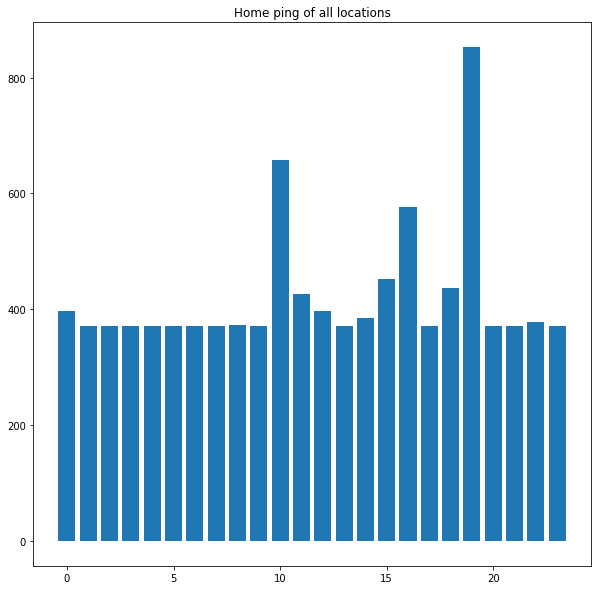

In [207]:
plt.figure(figsize=(10,10))
plt.bar(df_homeping["timestamp"], df_homeping["avg"])
plt.title("Home ping of all locations")
plt.show()

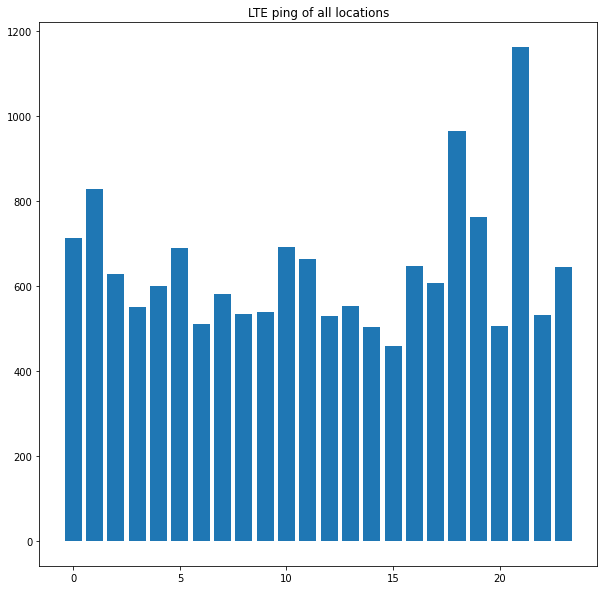

In [208]:
plt.figure(figsize=(10,10))
plt.bar(df_lteping["timestamp"], df_lteping["avg"])
plt.title("LTE ping of all locations")
plt.show()

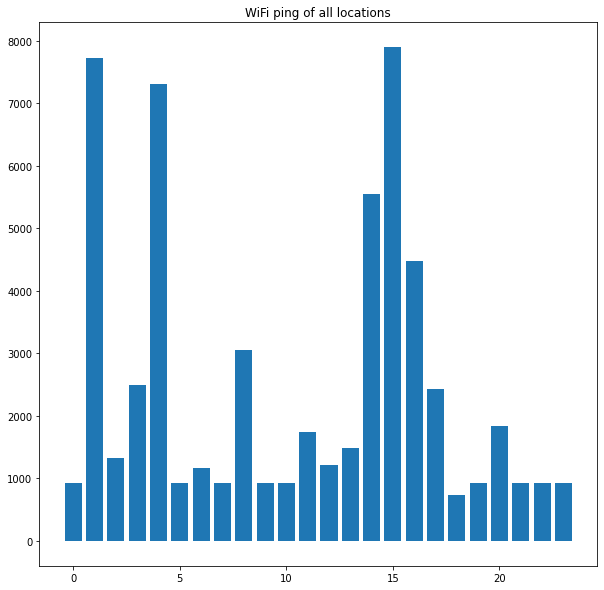

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(df_wifiping["timestamp"], df_wifiping["avg"])
plt.title("WiFi ping of all locations")
plt.show()

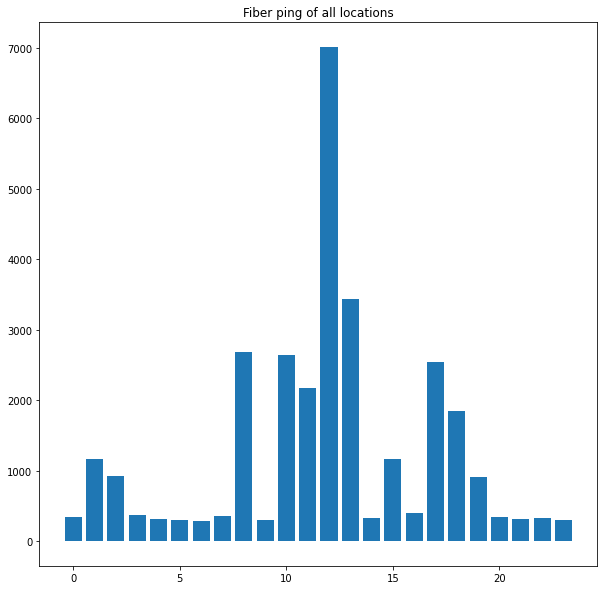

In [210]:
plt.figure(figsize=(10,10))
plt.bar(df_fiberping["timestamp"], df_fiberping["avg"])
plt.title("Fiber ping of all locations")
plt.show()

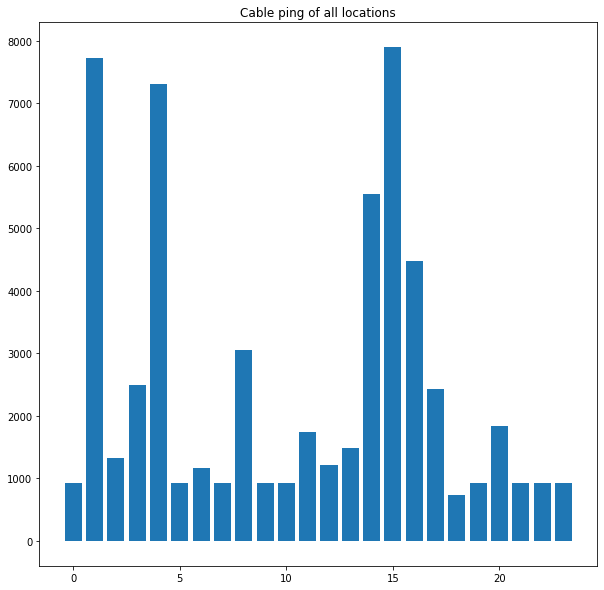

In [254]:
plt.figure(figsize=(10,10))
plt.bar(df_cableping["timestamp"], df_cableping["avg"])
plt.title("Cable ping of all locations")
plt.show()

UK latency

In [255]:
UK_homeping = df_homeping.loc[df_homeping['loc'] == 'UK']
UK_fiberping = df_fiberping.loc[df_fiberping['loc'] == 'UK']
UK_lteping = df_lteping.loc[df_lteping['loc'] == 'UK']
UK_wifiping = df_wifiping.loc[df_wifiping['loc'] == 'UK']
UK_cableping = df_cableping.loc[df_cableping['loc'] == 'UK']


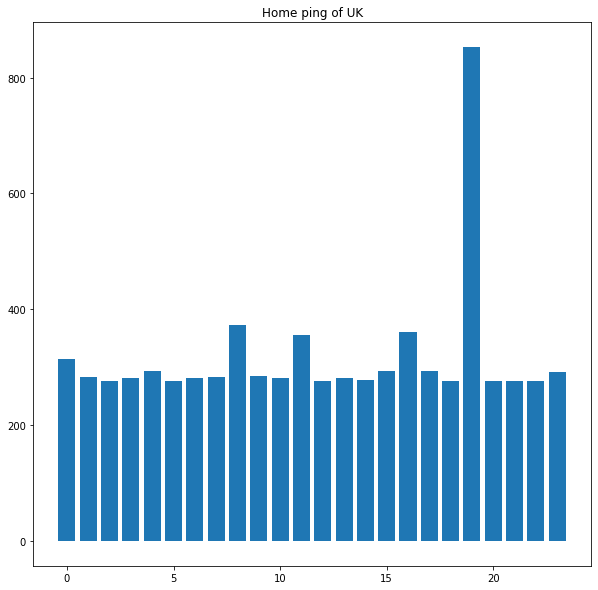

In [212]:
plt.figure(figsize=(10,10))
plt.bar(UK_homeping["timestamp"], UK_homeping["avg"])
plt.title("Home ping of UK")
plt.show()

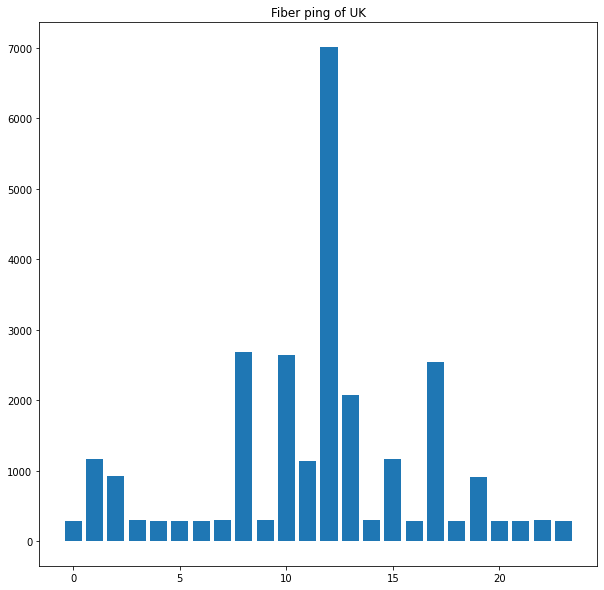

In [213]:
plt.figure(figsize=(10,10))
plt.bar(UK_fiberping["timestamp"], UK_fiberping["avg"])
plt.title("Fiber ping of UK")
plt.show()

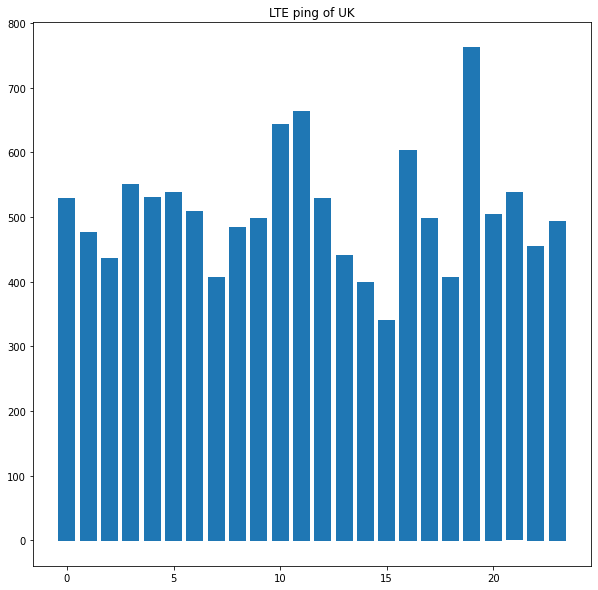

In [214]:
plt.figure(figsize=(10,10))
plt.bar(UK_lteping["timestamp"], UK_lteping["avg"])
plt.title("LTE ping of UK")
plt.show()

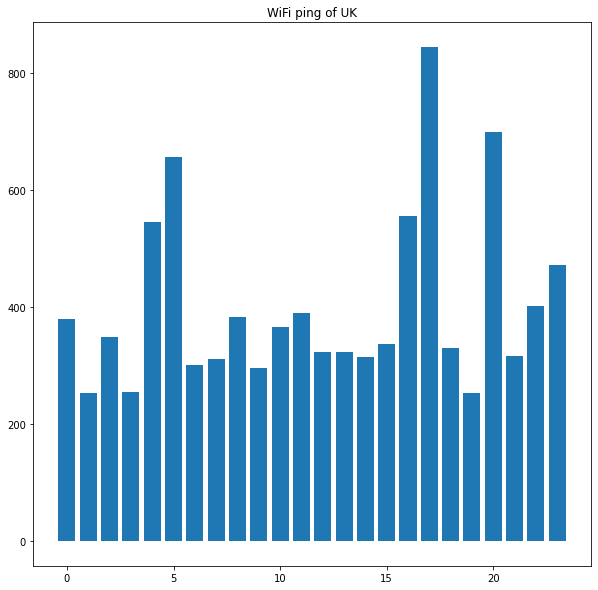

In [258]:
plt.figure(figsize=(10,10))
plt.bar(UK_wifiping["timestamp"], UK_wifiping["avg"])
plt.title("WiFi ping of UK")
plt.show()

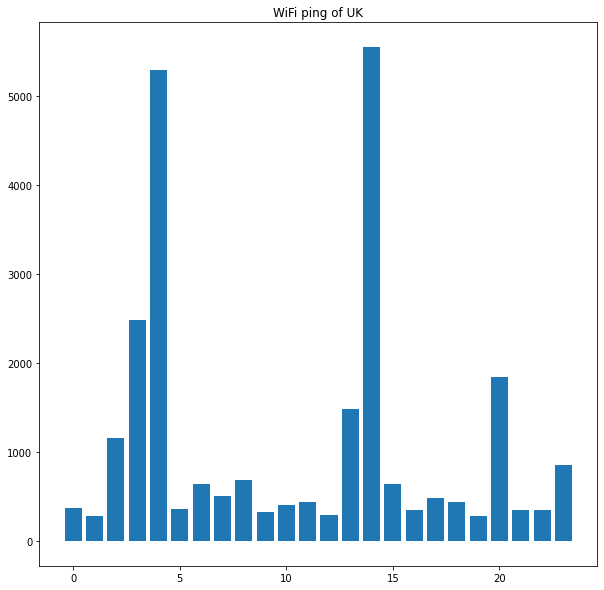

In [256]:
plt.figure(figsize=(10,10))
plt.bar(UK_cableping["timestamp"], UK_cableping["avg"])
plt.title("Cable ping of UK")
plt.show()

Canada latency

In [257]:
CA_homeping = df_homeping.loc[df_homeping['loc'] == 'CA']
CA_fiberping = df_fiberping.loc[df_fiberping['loc'] == 'CA']
CA_lteping = df_lteping.loc[df_lteping['loc'] == 'CA']
CA_wifiping = df_wifiping.loc[df_wifiping['loc'] == 'CA']
CA_cableping = df_cableping.loc[df_cableping['loc'] == 'CA']

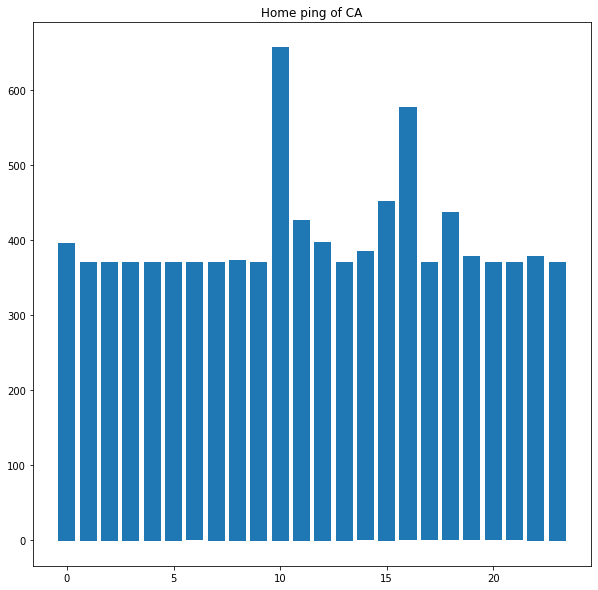

In [217]:
plt.figure(figsize=(10,10))
plt.bar(CA_homeping["timestamp"], CA_homeping["avg"])
plt.title("Home ping of CA")
plt.show()

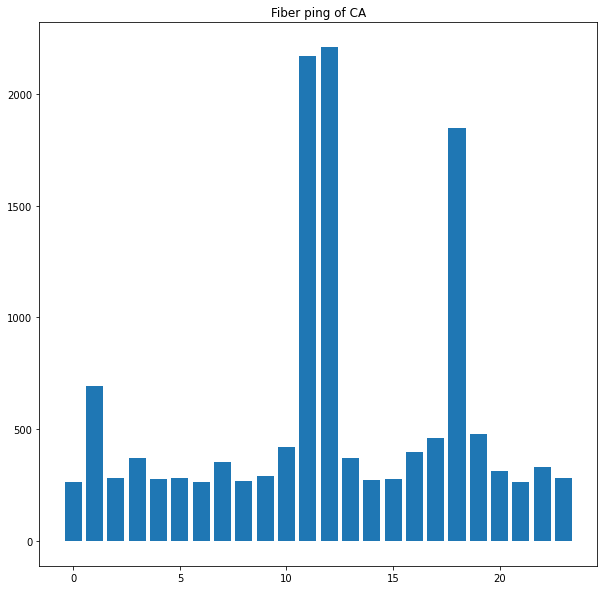

In [218]:
plt.figure(figsize=(10,10))
plt.bar(CA_fiberping["timestamp"], CA_fiberping["avg"])
plt.title("Fiber ping of CA")
plt.show()

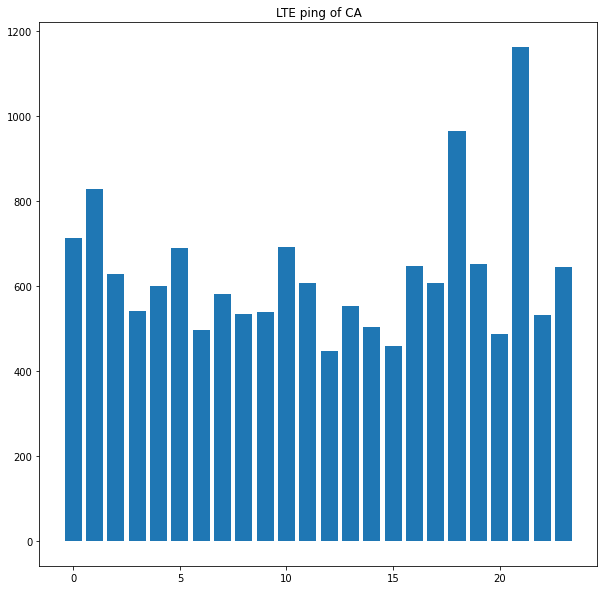

In [219]:
plt.figure(figsize=(10,10))
plt.bar(CA_lteping["timestamp"], CA_lteping["avg"])
plt.title("LTE ping of CA")
plt.show()

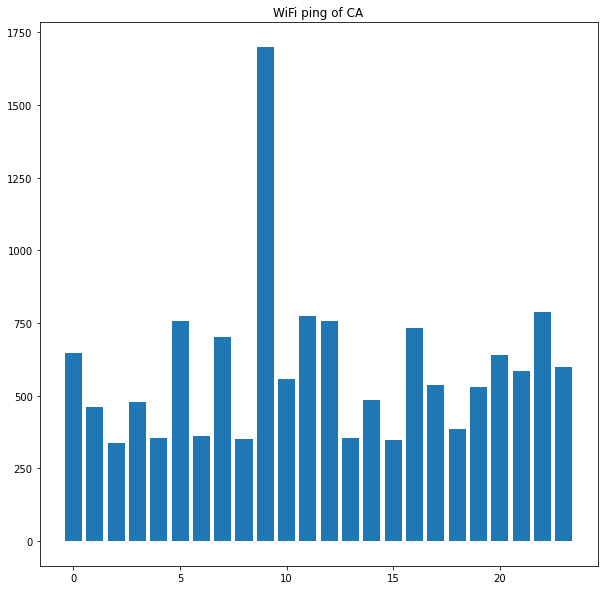

In [259]:
plt.figure(figsize=(10,10))
plt.bar(CA_wifiping["timestamp"], CA_wifiping["avg"])
plt.title("WiFi ping of CA")
plt.show()

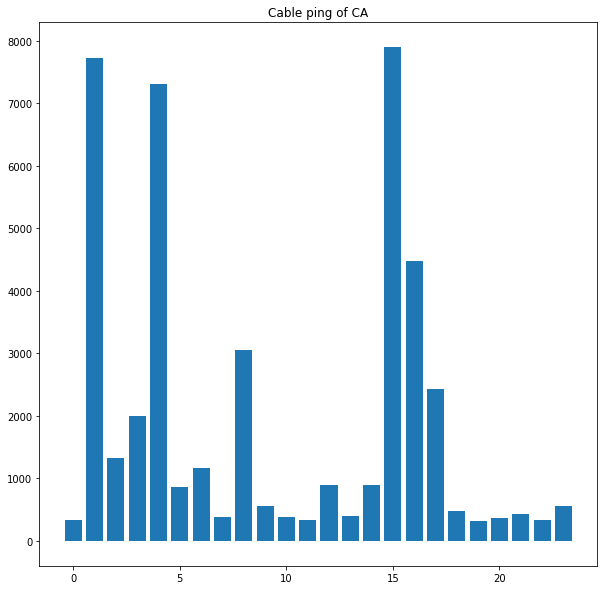

In [260]:
plt.figure(figsize=(10,10))
plt.bar(CA_cableping["timestamp"], CA_cableping["avg"])
plt.title("Cable ping of CA")
plt.show()

India latency

In [261]:
IN_homeping = df_homeping.loc[df_homeping['loc'] == 'IN']
IN_fiberping = df_fiberping.loc[df_fiberping['loc'] == 'IN']
IN_lteping = df_lteping.loc[df_lteping['loc'] == 'IN']
IN_wifiping = df_wifiping.loc[df_wifiping['loc'] == 'IN']
IN_cableping = df_cableping.loc[df_cableping['loc'] == 'IN']

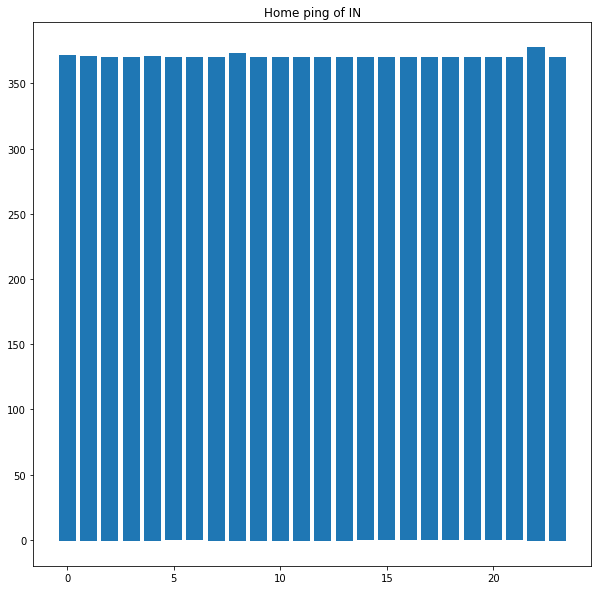

In [262]:
plt.figure(figsize=(10,10))
plt.bar(IN_homeping["timestamp"], IN_homeping["avg"])
plt.title("Home ping of IN")
plt.show()

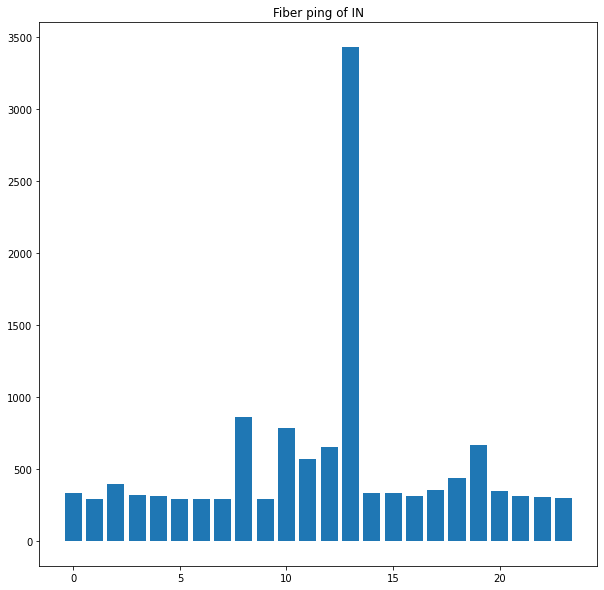

In [263]:
plt.figure(figsize=(10,10))
plt.bar(IN_fiberping["timestamp"], IN_fiberping["avg"])
plt.title("Fiber ping of IN")
plt.show()

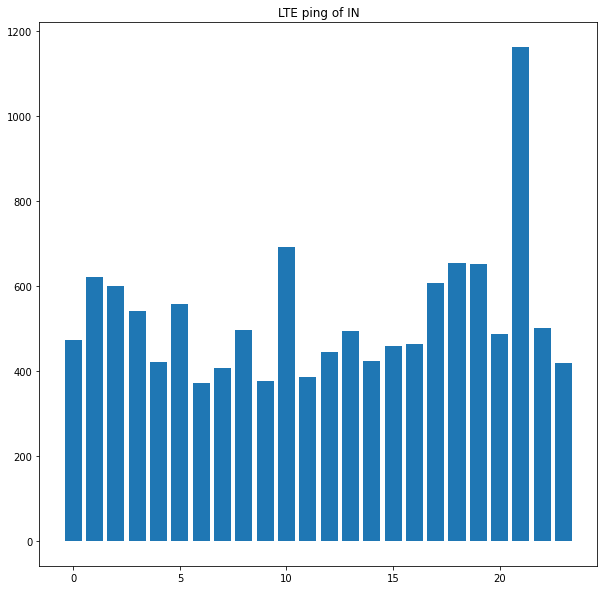

In [264]:
plt.figure(figsize=(10,10))
plt.bar(IN_lteping["timestamp"], IN_lteping["avg"])
plt.title("LTE ping of IN")
plt.show()

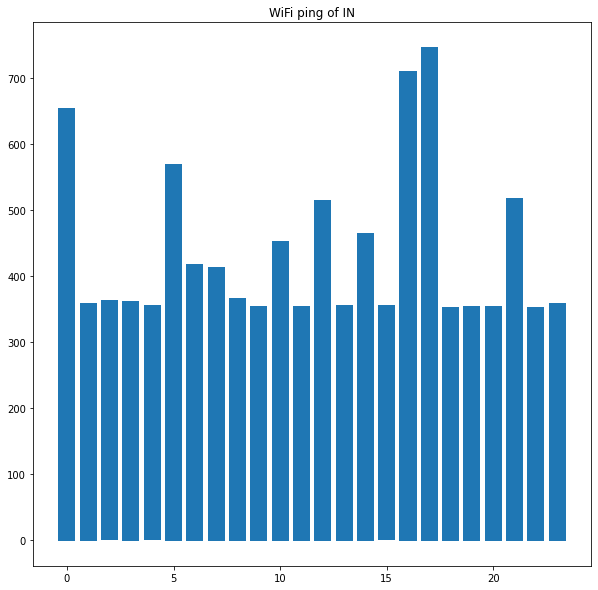

In [265]:
plt.figure(figsize=(10,10))
plt.bar(IN_wifiping["timestamp"], IN_wifiping["avg"])
plt.title("WiFi ping of IN")
plt.show()

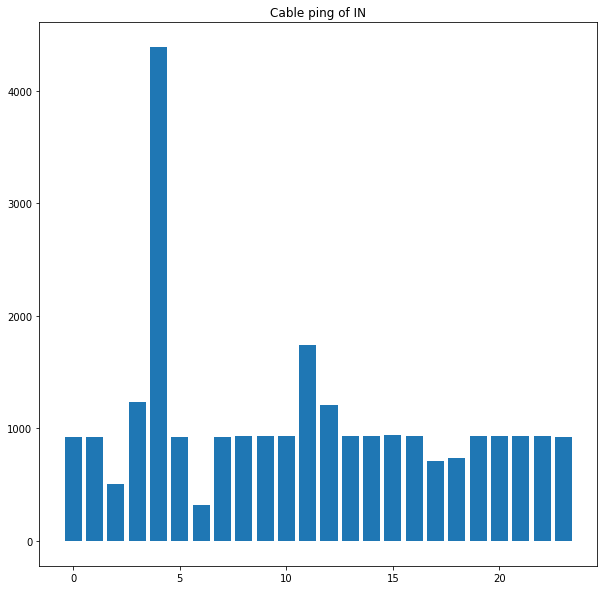

In [266]:
plt.figure(figsize=(10,10))
plt.bar(IN_cableping["timestamp"], IN_cableping["avg"])
plt.title("Cable ping of IN")
plt.show()